# Single QDot : Spin & Charge

## Create Framework

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import scipy as sci
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
# !pip install qutip
import numpy as np
from qutip import *
from tqdm import tqdm
import matplotlib.colors as mcolors
bar=ui.progressbar.EnhancedTextProgressBar(chunk_size=.1)

In [5]:
M=2   #Number of Localizations
N=2*M #total number of operators (Two positions times two spin polarizations)
zero=tensor([Qobj(np.zeros((2,2))) for i in range(N)])

fs=[tensor([create(2) if n==m else qeye(2) for m in range(N)]) for n in range(N)] #Bosonic creation operators
def sumj(j):
  s=tensor([Qobj(np.zeros((2,2))) for i in range(N)]) #zero operator
  i=0
  while i<j:
    s=s+fs[i].dag()*fs[i]
    i+=1
  return s
cs=[(1j*np.pi*sumj(j)).expm()*fs[j] for j in range (N)] #Jordan Wigner Transform
ns=[c*c.dag() for c in cs]

longc=cs.copy()
longn=ns.copy()
cs=[[cs[2*i],cs[2*i+1]] for i in range(M)] #reshaped cs containing fermionic operators
ns=[[ns[2*i],ns[2*i+1]] for i in range(M)]

Num=zero #Total number of electrons
for n in longn:
  Num=Num+n

In [6]:
zero

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [7]:
#Check commutation relations
for i in range(int(N/2)):
  for j in range(int(N/2)):
    for a in range(2):
      for b in range(2):
        if cs[i][a].dag()*cs[j][b]+cs[j][b]*cs[i][a].dag()!=tensor([qeye(2) for i in range(N)])*(i==j)*(a==b):
          print("Failure: ",i,j,a,b)
for i in range(int(N/2)):
    for a in range(2):
        if cs[i][a].dag()*cs[i][a].dag()!=tensor([qeye(2) for i in range(N)])*0:
          print("Failure: ",i,a)
for i in range(int(N/2)):
  for j in range(int(N/2)):
    for a in range(2):
      for b in range(2):
        if cs[i][a].dag()*cs[j][b].dag()+cs[j][b].dag()*cs[i][a].dag()!=tensor([qeye(2) for i in range(N)])*0:
          print("Failure: ",i,j,a,b)
#If no Failure is printed all is fulfilled

In [8]:
#Vacuum state
A=np.array([c.dag() for c in longc]).reshape(N*2**N,2**N)
vac=Qobj((sci.linalg.null_space(A)).reshape((2**N,)),shape=(2**N,1),dims=[[2]*N,[1]*N],type='ket') #define the vacuum state

In [9]:
#Spin operators
sx=[cs[i][0]*cs[i][1].dag()+cs[i][1]*cs[i][0].dag() for i in range(M)]
sy=[-1j*cs[i][0]*cs[i][1].dag()+1j*cs[i][1]*cs[i][0].dag() for i in range(M)]
sz=[cs[i][0]*cs[i][0].dag()-cs[i][1]*cs[i][1].dag() for i in range(M)]
#Location Pauli operators (Only sensible if M=2)
lx=[cs[0][i]*cs[1][i].dag()+cs[1][i]*cs[0][i].dag() for i in range(2)]
ly=[-1j*cs[0][i]*cs[1][i].dag()+1j*cs[1][i]*cs[0][i].dag() for i in range(2)]
lz=[cs[0][i]*cs[0][i].dag()-cs[1][i]*cs[1][i].dag() for i in range(2)]

In [10]:
lx[0]

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  

## Construct Basis 

Here we will start assuming M=2

In [11]:
c={'Tu':cs[0][0],'Td':cs[0][1],
   'Bu':cs[1][0],'Bd':cs[1][1],} #dictionary

In [12]:
# We will mainly work in the basis of the subspace of having a total of two electrons 
# Convention {uu,ud,du,dd,S0,0S} where S = ud-du
# We also use the convention of first creating in the second qubit, so uu = c_1u c_2u vac

# total Basis: {vac,u0,d0,0u,0d,uu,ud,du,dd,S0,0S,Su,Sd,uS,dS,SS}
Basis=[vac,
       c['Tu']*vac,
       c['Td']*vac,
       c['Bu']*vac,
       c['Bd']*vac,
       c['Tu']*c['Bu']*vac,
       c['Tu']*c['Bd']*vac,
       c['Td']*c['Bu']*vac,
       c['Td']*c['Bd']*vac,
       c['Tu']*c['Td']*vac/2-c['Td']*c['Tu']*vac/2,
       c['Bu']*c['Bd']*vac/2-c['Bd']*c['Bu']*vac/2,
       c['Tu']*c['Td']*c['Bu']*vac/2-c['Td']*c['Tu']*c['Bu']*vac/2,
       c['Tu']*c['Td']*c['Bd']*vac/2-c['Td']*c['Tu']*c['Bd']*vac/2,
       c['Tu']*c['Bu']*c['Bd']*vac/2-c['Tu']*c['Bd']*c['Bu']*vac/2,
       c['Td']*c['Bu']*c['Bd']*vac/2-c['Td']*c['Bd']*c['Bu']*vac/2,
       c['Tu']*c['Td']*(c['Bu']*c['Bd']*vac/2-c['Bd']*c['Bu']*vac/2)/2-c['Td']*c['Tu']*(c['Bu']*c['Bd']*vac/2-c['Bd']*c['Bu']*vac/2)/2]
       
ket={'00':Basis[0],
     'u0':Basis[1],
     'd0':Basis[2],
     '0u':Basis[3],
     '0d':Basis[4],
     'uu':Basis[5],
     'ud':Basis[6],
     'du':Basis[7],
     'dd':Basis[8],
     'S0':Basis[9],
     '0S':Basis[10],
     'Su':Basis[11],
     'Sd':Basis[12],
     'uS':Basis[13],
     'dS':Basis[14],
     'SS':Basis[15]}
bra={s:ket[s].dag() for s in ket}

## Construct Labframe Hamiltonian

In [13]:
# Define a function for summing up Hamiltonians of different types
func = lambda x:x
foo  = type(func)
def Hsum(Hs,t_dep=False):
    # Passing a list of hamiltonians Hs Hsum will return the sum of these hamiltonians, 
    # taking care of possible time dependent and inependent terms.
    func=lambda x:x
    Hfuncs=[h for h in Hs if type(h)==foo]
    Hconst=[h for h in Hs if type(h)==type(zero)]
    H=zero
    for Hi in Hconst:
        H=H+Hi
    if Hfuncs==[] and not t_dep:
        return H
    else:
        def out(t,args):
            Ht=zero
            for h in [h(t,args) for h in Hfuncs]:
                Ht=Ht+h
            return Ht+H
        return out
# Define a function taking operators and states to the rotating frame
def evolve(s,t,op,hbar=1):
    assert type(op)==type(zero)
    assert type(s) ==type(zero)
    U=(1j*op*t/hbar).expm()
    if s.type=='oper':
        return U*s*U.dag()
    if s.type=='ket':
        return U*s
    if s.type=='bra':
        return s*U.dag()

In [14]:
#Define parameters from physics and form of Hamiltonians   

ketbra=lambda s:ket[s]*bra[s]

#total spin operators
Sx,Sy,Sz=zero,zero,zero
for i in range(M):
    Sx+=sx[i]
    Sy+=sy[i]
    Sz+=sz[i]
    
#total location pauli operators
Lx,Ly,Lz=zero,zero,zero
for i in range(2):
    Lx+=lx[i]
    Ly+=ly[i]
    Lz+=lz[i]

Loc=zero
for i in range(M):
    for j in range(2):
        Loc+=(-1)**i*cs[i][j]*cs[i][j].dag()

E1     = 1         # Energies of the Basis states
E2     = 1.03         
E3     = -E1         
E4     = -E1+.03         
t      = 2       # Tunnelling rate 
SOT    = 3     # SpinOrbit Coupling
SOB    = 0
landau = 2         # g-factor
def H_model(E1=E1,E2=E2,E3=E3,E4=E4,SOT=SOT,SOB=SOB,t=t):
    s  = zero
    s += E1*ketbra('u0')+E2*ketbra('d0')+E3*ketbra('0u')+E4*ketbra('0d')
    s += SOT*ket['u0']*bra['d0']+SOB*ket['0u']*bra['0d']+np.conj(SOB)*ket['0d']*bra['0u']+np.conj(SOT)*ket['d0']*bra['u0']
    s +=  t*(ket['u0']*bra['0u']+ket['d0']*bra['0d'])+np.conj(t)*(ket['0u']*bra['u0']+ket['0d']*bra['d0'])
    return s


def H_chargesplit(E):
    if type(E)!=foo:
        return E*Lz
    else:
        return lambda t,args: E(t)*Lz

def H_spinsplit(E):
    return E*Sz
    
def H_EDSR(alpha,w,phi=0):
    if type(alpha)!=type((0,0)):
        return lambda t,arg: alpha/2*Sx*np.cos(w*t+phi) #+detune*Sz
    else:
        return lambda t,arg: (alpha[0]*sx[0]+alpha[1]*sx[1])/2*np.cos(w*t+phi) #+detune*Sz
    
def H_LZSI(eps,w,phi=0):
    if type(eps)!=foo:    #if time independent eps is passed as float
        return lambda t,args: eps/2*Lx#*np.cos(w*t+phi) #+detune*Lz
    else: #if time dependent eps is passed as a callable
        return lambda t,args: eps(t)/2*Lx#*np.cos(w*t+phi) #+detune*Lz
            
#TODO: Build an estimator that returns E1:4 and t as a function of the applied Field.
stuff=['u0','d0','0u','0d']
# stuff =['u0','d0','0u','0d','uu','ud','du','dd','S0','0S','Su','Sd','uS','dS','SS']
names=['|T⟩$\otimes$|u⟩','|T⟩$\otimes$|d⟩','|B⟩$\otimes$|u⟩','|B⟩$\otimes$|d⟩']
def subspace(H,basis=None):
    if basis==None:
        basis=[ket[s] for s in stuff]
    return np.array([[bi.dag()*H*bj for bj in basis] for bi in basis]).reshape((len(basis),len(basis)))


In [21]:
E_charge=1
E_spin  =1

alpha= (.1,0)
eps  = .1

on1=0                       #onset of first drive
T1=2*np.pi/eps*.5           #length of first drive
on2=1                       #wait before of second drive
T2=2*np.pi/.1               #length of second drive
chill=1 

T=on1+T1+on2+T2+chill

w_charge = E_charge*2
w_spin   = E_spin*2
def H(t,arg):
    if t<0:
        return  zero
    if t< on1:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t<on1+T1:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(0.1),H_LZSI(eps,w_charge)),t_dep=True)(t,arg)
    if t<on1+T1+on2:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t<on1+T1+on2+T2:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge),H_EDSR(alpha,w_spin)),t_dep=True)(t,arg)
    if t<=T:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t>T:
        return  zero
psi0=(ket['u0'])
N=500
tlist=np.linspace(0,T,N)
result=mesolve(H,psi0,tlist,progress_bar=bar,options=Options(store_states=True))


 Total run time:  12.98s*] Elapsed 12.98s / Remaining 00:00:00:00


1.0
0.9736166280557796
0.19999808418209644
0.0


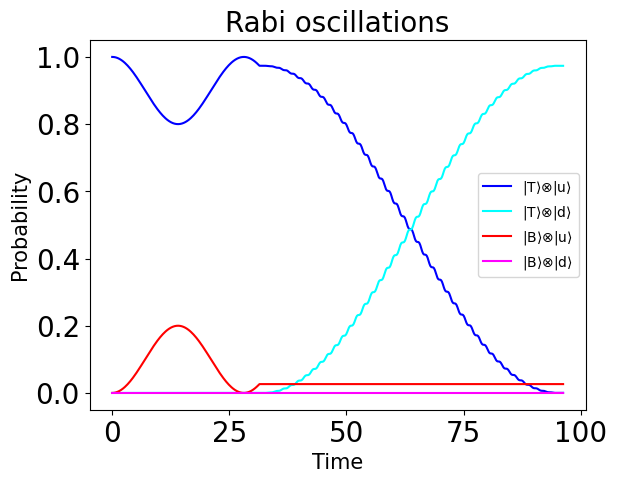

In [22]:
#Plot probabilities
cols=['blue','cyan','red','magenta']
for thing,name,col in zip( stuff,names,cols ):
  exs=[np.abs(s.overlap(ket[thing]))**2 for s in result.states]
  plt.plot(tlist,np.array(exs),label=name,color=col)
  print(np.max(np.array(exs)))
#plus=(ket['u0']+ket['d0'])/np.sqrt(2)
#exs=[np.abs(s.overlap(evolve(plus,t,Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge))))))**2 for t,s in zip(tlist,result.states)]
#plt.plot(tlist,np.array(exs),label='|+>')
#print(np.max(np.array(exs)))
plt.legend()
plt.title("Rabi oscillations",size=20)
plt.xlabel("Time",size=15)
plt.ylabel("Probability",size=15)
plt.savefig('rabi.eps',bbox_inches='tight')

In [13]:
for s,t in zip(stuff,names):
    print(s,t)

u0 |T⟩$\otimes$|u⟩
d0 |T⟩$\otimes$|d⟩
0u |B⟩$\otimes$|u⟩
0d |B⟩$\otimes$|d⟩


0.0


0.9757082059680507

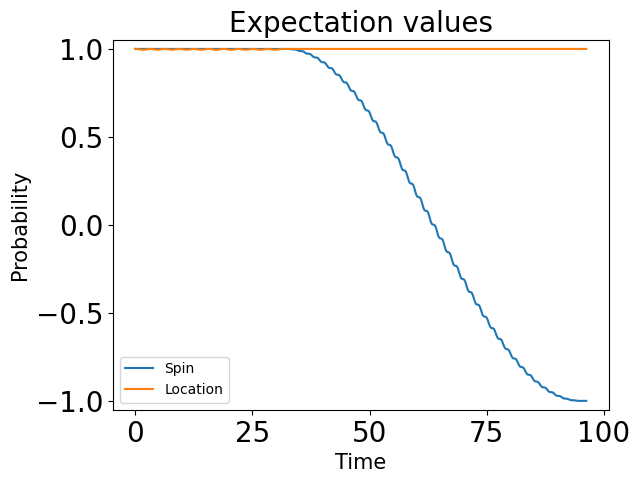

In [13]:
#Plot probabilities
expec_spin=[np.real(s.dag()*Sz*s)[0] for s in result.states]
plt.plot(tlist,np.array(expec_spin),label='Spin')
expec_loc=[np.real(s.dag()*Lz*s)[0] for s in result.states]
plt.plot(tlist,np.array(expec_loc),label='Location')
#plus=(ket['u0']+ket['d0'])/np.sqrt(2)
#exs=[np.abs(s.overlap(rot(plus,t,Bext,Bext)))**2 for t,s in zip(tlist,result.states)]
#plt.plot(tlist,np.array(exs),label='|+>')
print(np.max(np.array(exs)))
plt.legend()
plt.ylim((-1.05,1.05))
plt.title("Expectation values",size=20)
plt.xlabel("Time",size=15)
plt.ylabel("Probability",size=15)
plt.savefig('observe.eps',bbox_inches='tight')
np.abs(result.states[200].overlap(ket['u0']))**2

In [15]:
len(result.states)

500

## Swap

In [23]:
E_charge=1
E_spin  =1
E_charge_drive=.001

alpha= (.1,0)
alph = .1
eps  = .1

# First  : Drive CNot via location selective EDSR
# Second : Drive Hadamard on both spin and localization
# Third  : Drive another CNot via location selective EDSR
# Fourth : Drive another Hadamard on both spin and localization
# Fifth  : Drive another CNot via location selective EDSR


on1=0                       #onset of first drive
T1=2*np.pi/eps/4              #length of first drive
on2=1                       #wait before second drive
T2=2*np.pi/eps              #length of second drive
on3=1                       #wait before second drive
T3=2*np.pi/eps*0              #length of second drive
chill=1 

T=on1+T1+on2+T2+on3+T3+chill

w_charge = E_charge*2
w_spin   = E_spin*2
def H(t,arg):
    if t<0:
        return  zero
    if t< on1:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t<on1+T1:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge_drive),H_LZSI(eps,w_charge)),t_dep=True)(t,arg)
    if t<on1+T1+on2:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t<on1+T1+on2+T2:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge),H_EDSR(alpha,w_spin)),t_dep=True)(t,arg)
    if t<on1+T1+on2+T2+on3:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t<on1+T1+on2+T2+on3+T3:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge),H_EDSR(alpha,w_spin)),t_dep=True)(t,arg)
    if t<=T:
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge)),t_dep=True)(t,arg)
    if t>T:
        return  zero
def phase_c(t):
    if t<0:
        return 0
def phase_s(t):
    None
psi0=(ket['u0'])
N=500
tlist=np.linspace(0,T,N)
result=mesolve(H,psi0,tlist,progress_bar=bar,options=Options(store_states=True))


 Total run time:  13.13s*] Elapsed 13.13s / Remaining 00:00:00:00


1.0
0.4999031900911698
0.5000367202664201
0.0


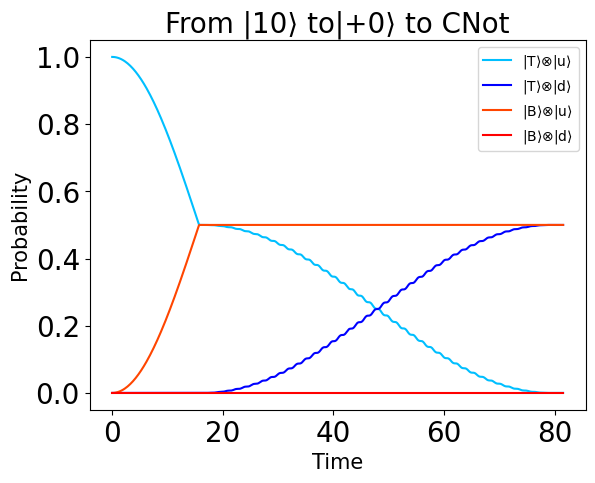

In [24]:
#Plot probabilities
cols=['deepskyblue','blue','orangered','red']
for thing,name,col in zip( stuff,names,cols ):
  exs=[np.abs(s.overlap(ket[thing]))**2 for s in result.states]
  plt.plot(tlist,np.array(exs),label=name,color=col)
  print(np.max(np.array(exs)))
#plus=(ket['u0']+ket['d0'])/np.sqrt(2)
#exs=[np.abs(s.overlap(evolve(plus,t,Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge))))))**2 for t,s in zip(tlist,result.states)]
#plt.plot(tlist,np.array(exs),label='|+>')
#print(np.max(np.array(exs)))
plt.legend()
plt.title('From |10⟩ to|+0⟩ to CNot',size=20)
plt.xlabel("Time",size=15)
plt.ylabel("Probability",size=15)
plt.savefig('rabi.eps',bbox_inches='tight')

In [231]:
stuff

['u0',
 'd0',
 '0u',
 '0d',
 'uu',
 'ud',
 'du',
 'dd',
 'S0',
 '0S',
 'Su',
 'Sd',
 'uS',
 'dS',
 'SS']

In [16]:
E_charge= -400 #ueV
E_spin  = 1
E_charge_drive= 0 #ueV

hbar = 6.582119569e2 #ueV*ps
alpha= (.1,0)
alph = .1
eps  = 11

# First  : Drive CNot via location selective EDSR
# Second : Drive Hadamard on both spin and localization
# Third  : Drive another CNot via location selective EDSR
# Fourth : Drive another Hadamard on both spin and localization
# Fifth  : Drive another CNot via location selective EDSR


on1=1/hbar                       #onset of drive
drivetime= 57/hbar             #length of second drive
stay=188/hbar                       #wait before second drive
chill=10/hbar 

T=(on1+drivetime+stay+drivetime+chill)*1.5
N=400
tlist=np.linspace(0,T,N)
Es = []
w_charge = E_charge*2
w_spin   = E_spin*2

def E(t):
      if t<on1:
        return E_charge
      elif t<=(drivetime+on1):
        return E_charge+(E_charge_drive-E_charge)*(t-(on1))/drivetime
      elif t<=(drivetime+on1+stay):
        return E_charge_drive
      elif t<=(drivetime+on1+stay+drivetime):
        return E_charge_drive+(E_charge-E_charge_drive)*(t-(drivetime+on1+stay))/drivetime
      else: return E_charge
Es=[E(t) for t in tlist]

def H(t,arg):
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E(t)),H_LZSI(eps,w_charge)),t_dep=True)(t,arg)
for t in tlist:
    H(t,0)

def phase_c(t):
    if t<0:
        return 0
        
def phase_s(t):
    None
psi0=(ket['u0'])
tlist=np.linspace(0,T,N)
result=mesolve(H,psi0,tlist,progress_bar=bar,options=Options(store_states=True))


 Total run time:   7.02s*] Elapsed 7.02s / Remaining 00:00:00:00


1.0
0.0
0.9972334370730758
0.0


Text(0, 0.5, 'Field')

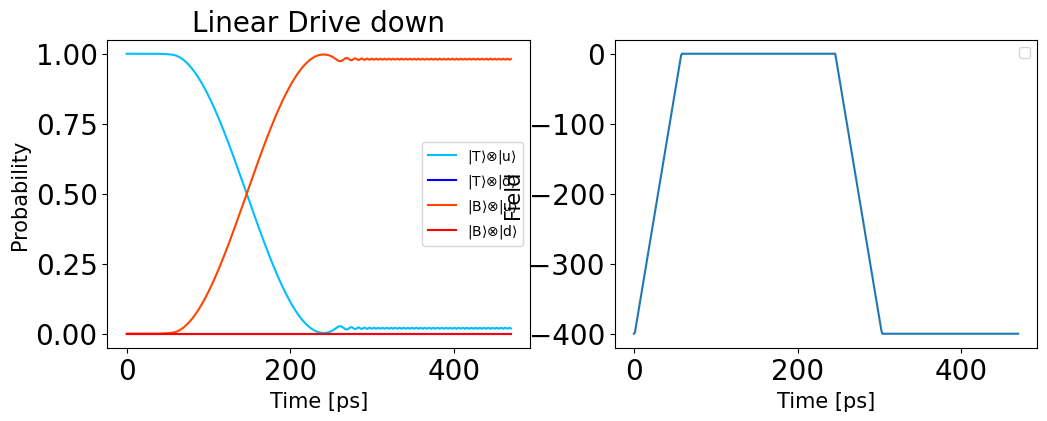

In [22]:
#Plot probabilities
fig, (ax1, ax2) = plt.subplots(1,2,figsize= (12,4))

cols=['deepskyblue','blue','orangered','red']
for thing,name,col in zip( stuff,names,cols ):
  exs=[np.abs(s.overlap(ket[thing]))**2 for s in result.states]
  ax1.plot(tlist*hbar,np.array(exs),label=name,color=col)
  print(np.max(np.array(exs)))

#plus=(ket['u0']+ket['d0'])/np.sqrt(2)
#exs=[np.abs(s.overlap(evolve(plus,t,Hsum((H_spinsplit(E_spin),H_chargesplit(E_charge))))))**2 for t,s in zip(tlist,result.states)]
#plt.plot(tlist,np.array(exs),label='|+>')
#print(np.max(np.array(exs)))

ax1.legend()
ax1.set_xlabel("Time [ps]",size=15)
ax1.set_ylabel("Probability",size=15)
ax1.set_title('Linear Drive down',size=20)

ax2.plot(tlist*hbar,Es)
ax2.legend()
ax2.set_xlabel("Time [ps]",size=15)
ax2.set_ylabel("Field",size=15)

# plt.savefig('rabi.eps',bbox_inches='tight')

In [24]:
################# Solve for different pulse amplitdes and waiting times ##################
E_charge= -400
E_spin  = 1
E_charge_drive= 0

hbar = 6.582119569e2 #ueV*ps
alpha= (.1,0)
alph = .1
eps  = 11

# First  : Drive CNot via location selective EDSR
# Second : Drive Hadamard on both spin and localization
# Third  : Drive another CNot via location selective EDSR
# Fourth : Drive another Hadamard on both spin and localization
# Fifth  : Drive another CNot via location selective EDSR

count = 0
on1=1/hbar                       #onset of drive
drivetime= 57/hbar             #length of second drive
# stay=np.pi*60/hbar                       #wait before second drive
chill=10/hbar 
i = 0
j = 0
E_charge_drive_list = np.linspace(-18,18,10) #[-100,0,200,300,400]#np.linspace(-200,200)
stay_list = np.linspace(25,100,10) #[0,94,188]
final_state = [ [0]*len(stay_list) for i in range(len(E_charge_drive_list))]
stay_array = np.array(stay_list)*np.pi/hbar

for E_charge_drive in E_charge_drive_list:
  for stay in stay_array:
    T=(on1+drivetime+stay+drivetime+chill)*1.1
    N=400
    tlist=np.linspace(0,T,N)
    Es = []
    w_charge = E_charge*2
    w_spin   = E_spin*2

    def E(t):
      if t<on1:
        return E_charge
      elif t<=(drivetime+on1):
        return E_charge+(E_charge_drive-E_charge)*(t-(on1))/drivetime
      elif t<=(drivetime+on1+stay):
        return E_charge_drive
      elif t<=(drivetime+on1+stay+drivetime):
        return E_charge_drive+(E_charge-E_charge_drive)*(t-(drivetime+on1+stay))/drivetime
      else: return E_charge
    Es=[E(t) for t in tlist]

    def H(t,arg):
        return  Hsum((H_spinsplit(E_spin),H_chargesplit(E(t)),H_LZSI(eps,w_charge)),t_dep=True)(t,arg)
    for t in tlist:
      H(t,0)

    def phase_c(t):
       if t<0:
          return 0
        
    def phase_s(t):
        None

    psi0=(ket['u0'])
    tlist=np.linspace(0,T,N)
    result=mesolve(H,psi0,tlist,options=Options(store_states=True))
    final_state[i][j]=np.abs(result.states[-1].overlap(ket['0u']))**2
    # print(final_state)
    # print(i,j)
    j=j+1
    count +=1
    print("Round",count,"/",len(E_charge_drive_list)*len(stay_list))
  j=0
  i=i+1

Round 1 / 100
Round 2 / 100
Round 3 / 100
Round 4 / 100
Round 5 / 100
Round 6 / 100
Round 7 / 100
Round 8 / 100
Round 9 / 100
Round 10 / 100
Round 11 / 100
Round 12 / 100
Round 13 / 100
Round 14 / 100
Round 15 / 100
Round 16 / 100
Round 17 / 100
Round 18 / 100
Round 19 / 100
Round 20 / 100
Round 21 / 100
Round 22 / 100
Round 23 / 100
Round 24 / 100
Round 25 / 100
Round 26 / 100
Round 27 / 100
Round 28 / 100
Round 29 / 100
Round 30 / 100
Round 31 / 100
Round 32 / 100
Round 33 / 100
Round 34 / 100
Round 35 / 100
Round 36 / 100
Round 37 / 100
Round 38 / 100
Round 39 / 100
Round 40 / 100
Round 41 / 100
Round 42 / 100
Round 43 / 100
Round 44 / 100
Round 45 / 100
Round 46 / 100
Round 47 / 100
Round 48 / 100
Round 49 / 100
Round 50 / 100
Round 51 / 100
Round 52 / 100
Round 53 / 100
Round 54 / 100
Round 55 / 100
Round 56 / 100
Round 57 / 100
Round 58 / 100
Round 59 / 100
Round 60 / 100
Round 61 / 100
Round 62 / 100
Round 63 / 100
Round 64 / 100
Round 65 / 100
Round 66 / 100
Round 67 / 100
Roun

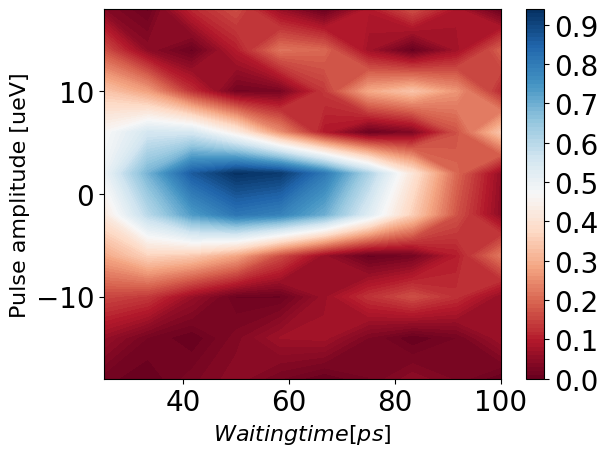

In [25]:
############### Plot color map ####################
# print(final_state)
plt.contourf(stay_list,E_charge_drive_list ,final_state , 100, cmap=matplotlib.cm.get_cmap('RdBu'))
plt.xlabel(r'$Waiting time [ps]$', fontsize=16)
plt.ylabel(r'Pulse amplitude [ueV]', fontsize=16)
plt.colorbar()
plt.savefig('Colormap100x100_zoom_v3.svg', dpi = 200, bbox_inches = 'tight')